<a href="https://colab.research.google.com/github/nmmartinezp/Inmersion_De_Datos/blob/main/Clase2_desafios_Inmersion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONECTAR DRIVE

CONECTAR MI DRIVE

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


CONECTAR ARCHIVO CSV

In [10]:
import pandas as pd

inmuebles = pd.read_csv("/content/drive/MyDrive/inmersion_de_datos/inmuebles_bogota.csv")

columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)#vista aleatoria de 10 filas

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
4320,Apartamento,Apartamento en venta en Usaquén,3,4,170,Usaquén,Usaquén,$ 1.320.000.000
997,Apartamento,Apartamento en venta en Kennedy,3,1,47,Kennedy,Kennedy Central,$ 137.000.000
5233,Apartamento,Apartamento en venta en Usaquén,3,2,73,Usaquén,Usaquén,$ 310.000.000
3462,Apartamento,Apartamento en venta en Chapinero,3,3,190,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.495.000.000
6903,Apartamento,Apartamento en venta en Usaquén,3,3,170,Usaquén,Usaquén,$ 920.000.000
5867,Apartamento,Apartamento en venta en Antonio Nariño,3,2,59,Antonio Nariño,Restrepo,$ 245.000.000
3867,Apartamento,Apartamento en venta en El Batán,2,2,50,El Batán,La Alhambra,$ 310.000.000
3960,Oficina/Consultorio,Oficina/Consultorio en venta en Zona Noroccide...,2,1,43,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 520.000.000
7065,Casa,Casa en venta en Suba,2,1,50,Suba,Suba,$ 139.000.000
3415,Apartamento,Apartamento en venta en Engativa,3,2,81,Engativa,Engativá,$ 410.000.000


# IMPORTAR LIBRERIAS

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# DESAFIO 1

Agregando columnas al dataset, convirtiendo datos de la columna valor a datos float

In [27]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.head(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.0
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.0
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.0
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.0
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.0
5,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000,$,510000000,510.0
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 500.000.000,$,500000000,500.0
7,Apartamento,Apartamento en venta en Bella Suiza,3,4,212,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 2.350.000.000,$,2350000000,2350.0
8,Apartamento,Apartamento en venta en El Chicó,3,2,159,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000,$,850000000,850.0
9,Apartamento,Apartamento en venta en Bella Suiza,2,2,80,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 642.000.000,$,642000000,642.0


In [28]:
inmuebles.Tipo.value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

Asignando los datos de Local, Edificio y Bodega a inmuebleria

In [100]:
inmuebleria = inmuebles.query('Tipo in ["Local", "Edificio", "Bodega"]')
inmuebleria.sort_values(by='Precio_Millon', ascending=False)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
5234,Edificio,Edificio en venta en Usaquén,12,7,1664,Usaquén,Usaquén,$ 16.000.000.000,$,16000000000,16000.0
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000,$,9200000000,9200.0
5021,Edificio,Edificio en venta en Las Nieves,15,6,1800,Las Nieves,SANTA FE: Las Nieves + Sagrado Corazón,$ 7.000.000.000,$,7000000000,7000.0
2604,Edificio,Edificio en venta en Las Nieves,15,6,1800,Las Nieves,SANTA FE: Las Nieves + Sagrado Corazón,$ 7.000.000.000,$,7000000000,7000.0
2090,Local,Local en venta en Chapinero,16,9,650,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 5.800.000.000,$,5800000000,5800.0
...,...,...,...,...,...,...,...,...,...,...,...
357,Bodega,Bodega en venta en Puente Aranda,3,2,68,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 164.000.000,$,164000000,164.0
2144,Bodega,Bodega en venta en San Patricio,2,1,19,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 120.000.000,$,120000000,120.0
2271,Bodega,Bodega en venta en San Patricio,2,1,19,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 120.000.000,$,120000000,120.0
4926,Bodega,Bodega en venta en San Patricio,2,1,19,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 120.000.000,$,120000000,120.0


Realizando graficos de inmuebleria

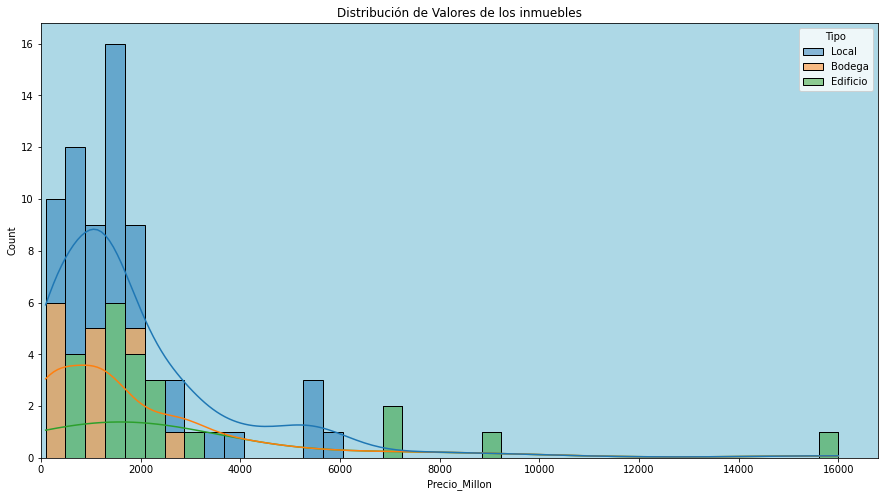

In [132]:
plt.figure(figsize=(15,8))
grafica = sns.histplot(data=inmuebleria, x='Precio_Millon', kde=True, hue='Tipo', bins=40, multiple="stack")
grafica.set_title('Distribución de Valores de los inmuebles')
grafica.set_facecolor(color='lightblue')
plt.xlim(0)
plt.show()

# DESAFIO 2

Obtener precio por m2

In [147]:
inmuebles['Precio_m2'] = inmuebles['Precio_Millon']/inmuebles['Area']
Precio_Promedio = inmuebles.groupby('Barrio')['Precio_m2'].mean().reset_index()
Precio_Promedio

,Barrio,Precio_m2
0,Alameda,5.979381
1,Alhambra,4.326836
2,Andes Norte,6.050350
3,Antonio Nariño,3.530638
4,Barrancas,4.415957
...,...,...
144,Villa Maria,2.044511
145,Villas De Granada,3.168840
146,Villemar,3.989697
147,Zona Franca,2.962963


Graficar

Se grafican todos los promedios m2 por barrio

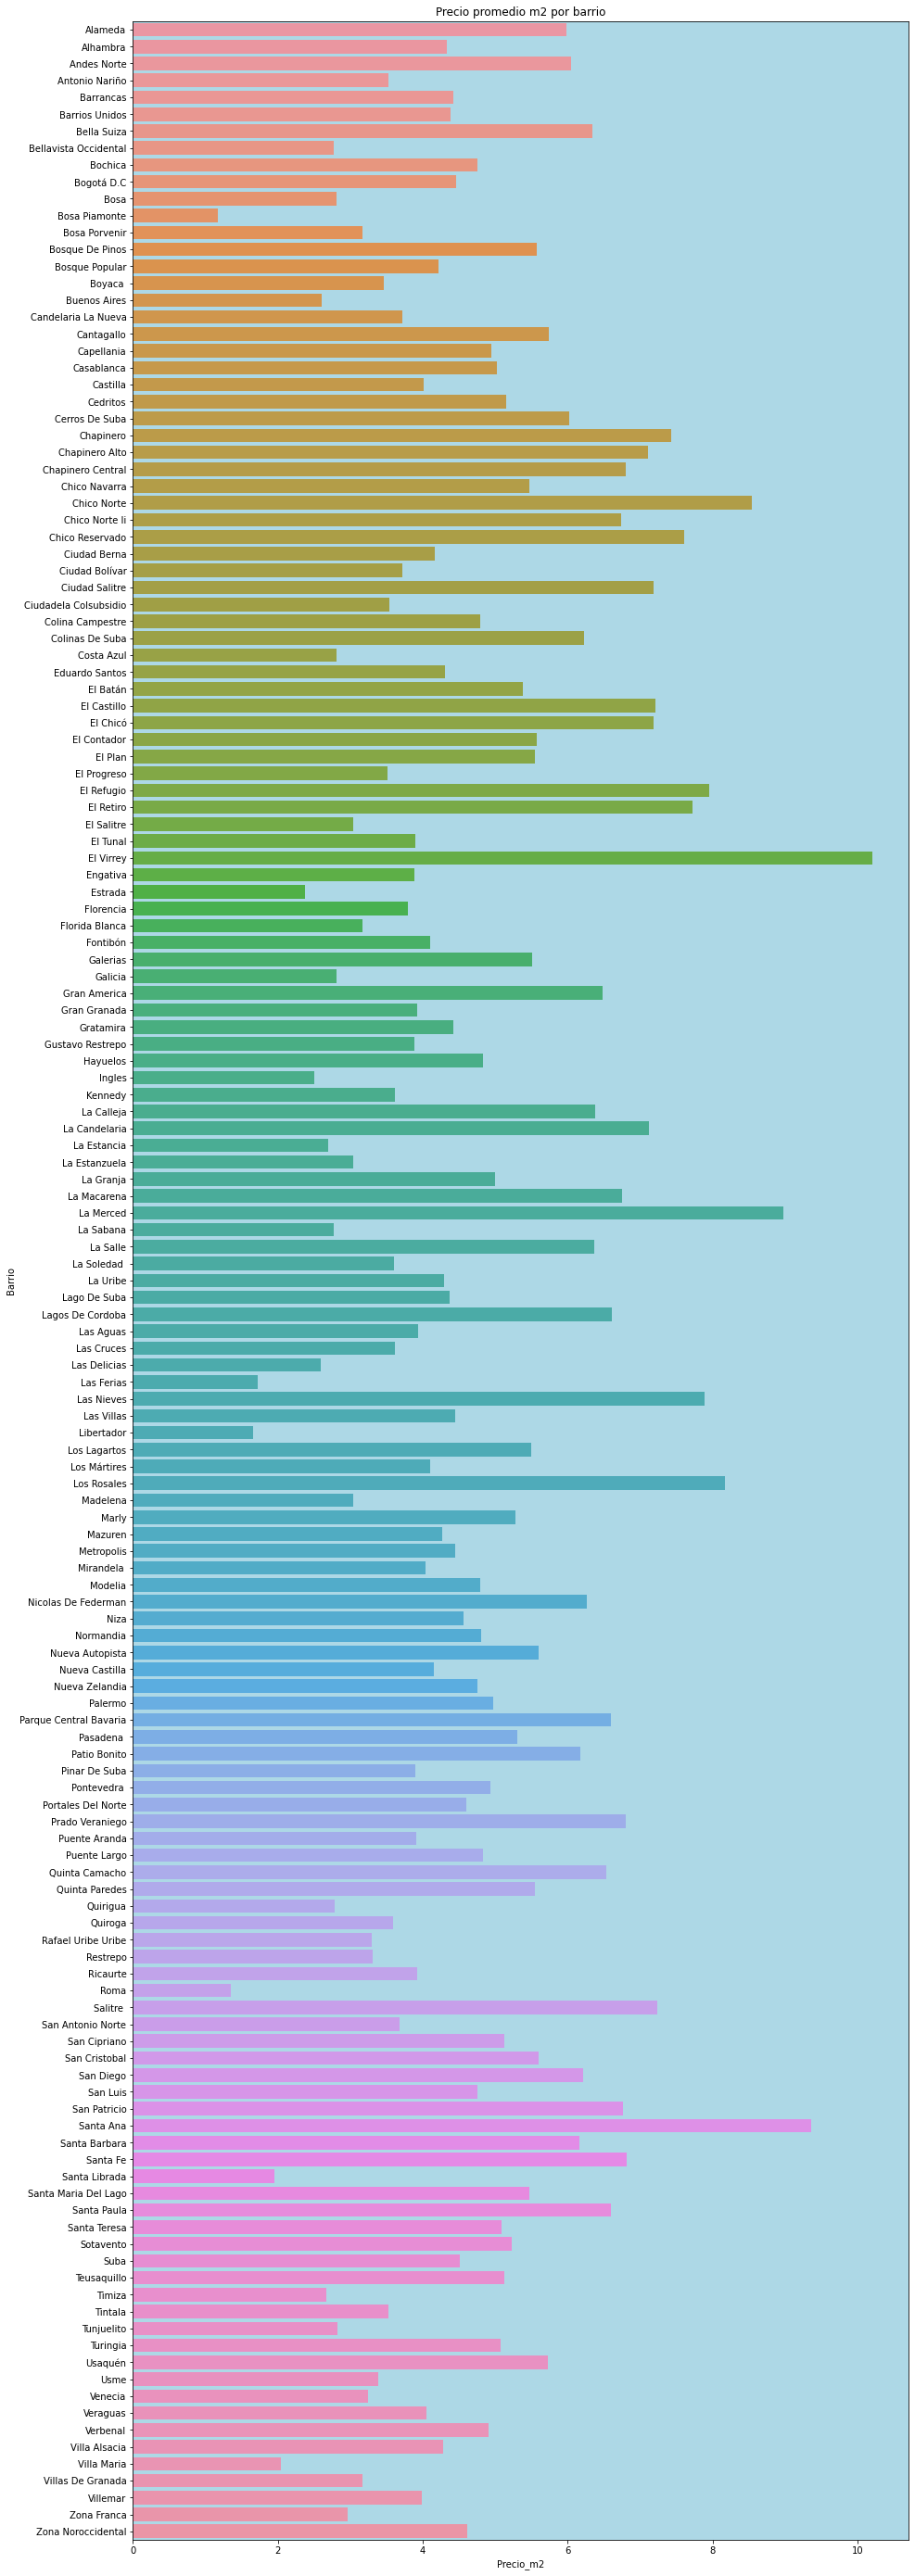

In [175]:
plt.figure(figsize=(15,50))
grafica = sns.barplot(data=Precio_Promedio, x='Precio_m2', y='Barrio')
grafica.set_title('Precio promedio m2 por barrio')
grafica.set_facecolor(color='lightblue')
plt.xlim(0)
plt.show()

La grafica anterior es muy dificil de leer a simple vista, en la siguiente solo se grafican los top 10 barrios

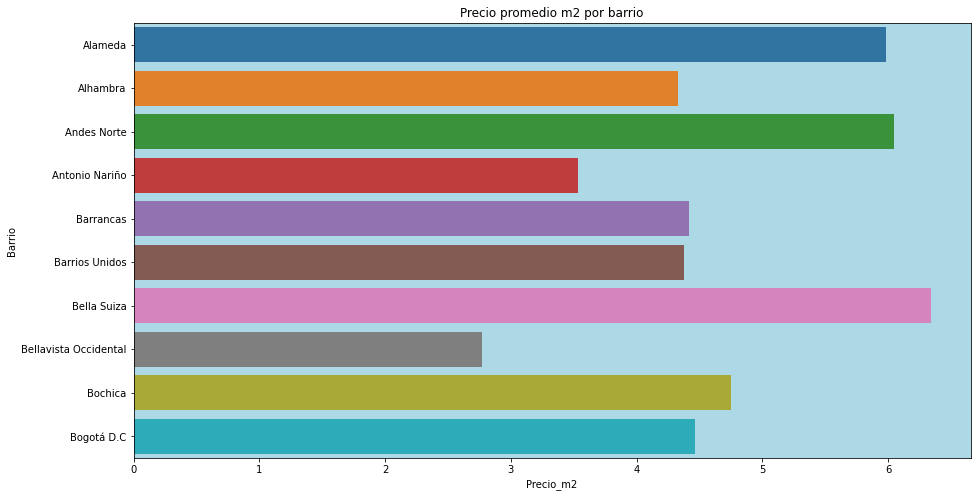

In [176]:
plt.figure(figsize=(15,8))
grafica = sns.barplot(data=Precio_Promedio.head(10), x='Precio_m2', y='Barrio')
grafica.set_title('Precio promedio m2 por barrio')
grafica.set_facecolor(color='lightblue')
plt.xlim(0)
plt.show()